# Домашнее задание № 2, Описательный анализ

Вам предложены данные iFood — приложения для доставки еды в Бразилии, представленного более чем в тысяче городов.
Поддержание высокой вовлеченности клиентов является важной задачей для компании. Для того, чтобы создавать новые предложения и проводить качественные рекламные кампании, необходимо понимать особенности и потребности целевой аудитории. Для этого были собраны данные о клиентах, использующих приложение. Вам предстоит выявить особенности людей, пользующихся данным приложением и найти интересные закономерности.

Почитать про компанию можно, например, на википедии:) https://en.wikipedia.org/wiki/IFood

Описание данных:
    
* AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
* Complain - 1 if customer complained in the last 2 years
* DtCustomer - date of customer’s enrolment with the company
* Education - customer’s level of education
* Marital - customer’s marital status
* Kidhome - number of small children in customer’s household
* Teenhome - number of teenagers in customer’s household
* Income - customer’s yearly household income
* MntFishProducts - amount spent on fish products in the last 2 years
* MntMeatProducts - amount spent on meat products in the last 2 years
* MntFruits - amount spent on fruits products in the last 2 years
* MntSweetProducts - amount spent on sweet products in the last 2 years
* MntWines - amount spent on wine products in the last 2 years
* MntGoldProds - amount spent on gold products in the last 2 years
* NumDealsPurchases - number of purchases made with discount
* NumCatalogPurchases - number of purchases made using catalogue
* NumStorePurchases - number of purchases made directly in stores
* NumWebPurchases - number of purchases made through company’s web site
* NumWebVisitsMonth - number of visits to company’s web site in the last month
* Recency - number of days since the last purchase

## Немного важной информации:

1. Обязательно гуглите! Использование дополнительных методов не карается, но приветствуется (если вы сможете объяснить принцип их работы) Однако, если вы нашли что-то полезное и хотите скопировать себе - сделав это, добавьте в начале ячейки ссылку на источник. В противном случае это будет считаться плагиатом.

2. Плагиат не допускается и строго наказывается. Единственное возможное исключение - код, заимствованный из интернета, с ссылкой на источник.

**!!! Важно: к каждому действию необходимо написать краткий комментарий 1-2 фразами через # о том, что вы делаете в этой ячейке и что у вас получилось**

## Задание 1 (1 балл): предобработка данных

**некоторые комментарии в ДЗ прописаны Markdown для читабельности**

Откройте предложенные данные.

In [ ]:
# импортируем необходимые библиотеки
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [ ]:
data = pd.read_csv("marketing.csv")
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


Изучите ваши данные. Какие типы данных здесь представлены? Все ли данные считались в корректном и удобном для работы формате? Если нет, то с какими данными есть проблемы?

In [ ]:
# С помощью метода info посмотрю, какие типы данных представлены в нашей таблице
## В наших данных чаще всего встречаются целые числа (int) и текстовая информация (object),
## при этом некоторые столбцы стоит преобразовать в иной тип данных:
## income (доход, но представлена в виде текстовой информации )
## и Dt_Customer (дата, но представлена в виде текстовой информации)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

Теперь необходимо привести некоторые данные в корректный вид. Преобразуйте признак income так, чтобы значения этого признака были обычными вещественными числами (float)

In [ ]:
data['Income'] = data['Income'].str.replace('$', '')
data['Income'] = data['Income'].str.replace(',', '')
data['Income'] = data['Income'].astype(float)

/var/folders/yk/y4brywlj7hggth8sp2wv0fmc0000gn/T/ipykernel_64647/2308584167.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Income'] = data['Income'].str.replace('$', '')


Кроме того, даты нам было бы удобнее представить в корректном формате ГГГГ-ММ-ДД. Преобразуйте данные с датами в соответствующий вид.

In [ ]:
# Ваш код и комментарий
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

## Задание 2 (1.5 балла): пропуски и выбросы

Исследуйте данные на предмет пропусков и выбросов. Есть ли в данных пропуски? Сколько и в каких признаках? Как вы будете их обрабатывать? Обработайте пропуски, пояснив выбранную вами стратегию обработки.

_важно: просто удалить - это не стратегия обработки, придумайте что-то другое_

In [ ]:
# С помощью методов isna и sum посчитаем количество пропущенных значений в каждом столбце
## В итоге оказалось, что пропуски есть только в переменной Income (24 значения)
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [ ]:
# Стратегия обработки пропущенных значений будет заключаться в заполнении случайными данными,
## этот метод лучше, так как если заполнять нулем или МЦТ
### можно получить крайне неестественное распределение.
data['Income'] = data['Income'].fillna(np.random.choice(data['Income'].dropna()))
# Чтобы обработать данные, импортируем библиотеку для работы со случайными числами и numpy
## С помощью метода fillna заполняем пропуски, а с помощью метода choice показываем,
## чем заполним данные: случайными числами из столбца, в котором нет пропусков (условно удалим их)

Исследуйте данные на предмет выбросов и удалите их, если они есть. Если выбросы есть - продемонстрируйте это численно и с помощью визуализаций. Прокомментируйте, как вы ищете выбросы, и почему их стоит удалить.

In [ ]:
# Чтобы посчитать количество выбросов в каждом столбце - создам функцию по расчету выбросов,
# используя способ межквартильного размаха.
## Выбросами будут считаться те значения, у которых 1,5 IQR будет меньше или больше Q1 и Q3.
def emissions_сount(value):
    # рассчитываем 1 и 3 квартиль в столбце
    q1 = np.percentile(value, 25)
    q3 = np.percentile(value, 75)
    # находим межквартильное расстояние
    iqr=q3-q1
    # находим нижнюю и верхнюю границы по формулам
    b_line = q1 - 1.5*iqr
    u_line = q3 + 1.5*iqr
    # находим количество выбросов через фильтрацию и атрибут shape
    x = data[(value <= b_line)
         |(value >= u_line)].shape[0]
    return x

In [ ]:
# Сразу же создам функцию по удалению выбросов, если это будет необходимо
def emissions_delete(value):
    # рассчитываем 1 и 3 квартиль в столбце
    q1 = np.percentile(value, 25)
    q3 = np.percentile(value, 75)
    # находим межквартильное расстояние
    iqr=q3-q1
    # находим нижнюю и верхнюю границы по формулам
    b_line = q1 - 1.5*iqr
    u_line = q3 + 1.5*iqr
    # создаем датасет, в котором будут только данные без выбросов
    data_new = data[(value > b_line)
         &(value < u_line)]
    return data_new

Из наших данных релевантнее всего находить выбросы среди следующих столбцов:
1. Year_Birth
2. Kidhome
3. Teenhome
4. Recency
5. MntWines
6. MntFruits
7. MntMeatProducts
8. MntFishProducts
9. MntSweetProducts
10. MntGoldProds
11. NumDealsPurchases
12. NumWebPurchases
13. NumCatalogPurchases
14. NumStorePurchases
15. NumWebVisitsMonth

**Все остальные переменные являются категориальными переменными, некоторые из них закодированы числами (например, бинарная переменная по жалобам). Выбросы я удалю, так как не знаю, вызваны они ошибками в данных (при заполнении) или же это реальные экстремальные значения, которые могут мешать исследованию. Удалять буду в новом датасете, оригинальный  трогать не буду**

Количество выбросов: 3


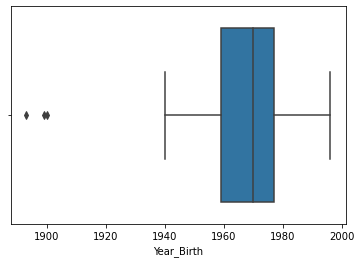

In [ ]:
# Для визуализации выбросов воспользуюсь библиотекой seaborn и методом boxplot
sns.boxplot(x = data['Year_Birth'])
# Вывожу количество выбросов, используя созданную функцию
print('Количество выбросов:', emissions_сount(data['Year_Birth']))

In [ ]:
# Выбросов в переменной Year_Birth - 3, следовательно, их можно удалить (они удалены от центра)
## Для удаления воспользуюсь функцией удаления и сохраню изменения в новый датасет,
## старый датасет трогать не буду
data_new = emissions_delete(data['Year_Birth'])

Количество выбросов: 0


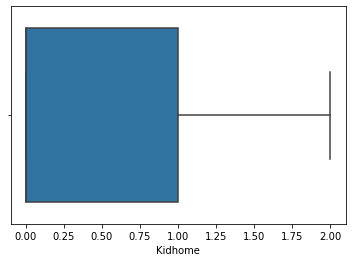

In [ ]:
sns.boxplot(x = data['Kidhome'])
print('Количество выбросов:', emissions_сount(data['Kidhome']))
# Выбросов нет

Количество выбросов: 0


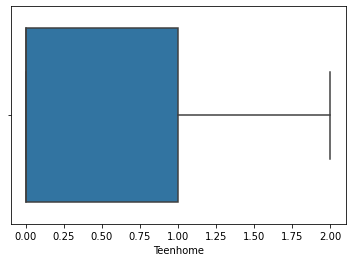

In [ ]:
sns.boxplot(x = data['Teenhome'])
print('Количество выбросов:', emissions_сount(data['Teenhome']))
# Выбросов нет

Количество выбросов: 0


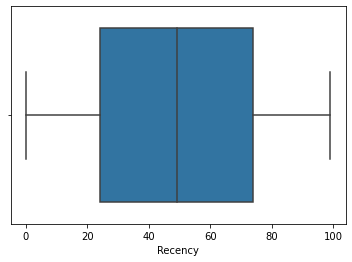

In [ ]:
sns.boxplot(x = data['Recency'])
print('Количество выбросов:', emissions_сount(data['Recency']))
# Выбросов нет

Количество выбросов: 35


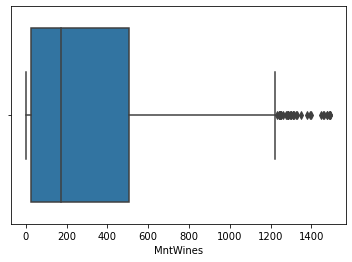

In [ ]:
sns.boxplot(x = data['MntWines'])
print('Количество выбросов:', emissions_сount(data['MntWines']))

In [ ]:
# Выбросов в переменной MntWines - 35, следовательно, их можно удалить
## Для удаления воспользуюсь функцией удаления и сохраню изменения в новый датасет,
## старый датасет трогать не буду
data_new = emissions_delete(data['MntWines'])

Количество выбросов: 233


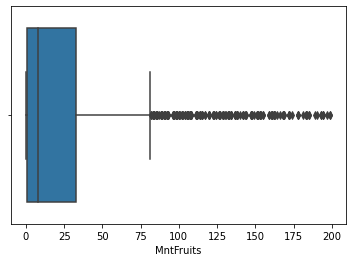

In [ ]:
sns.boxplot(x = data['MntFruits'])
print('Количество выбросов:', emissions_сount(data['MntFruits']))

In [ ]:
# Выбросов в переменной MntFruits - 233, следовательно, их можно удалить
## Для удаления воспользуюсь функцией удаления и сохраню изменения в новый датасет,
## старый датасет трогать не буду
data_new = emissions_delete(data['MntFruits'])

Количество выбросов: 175


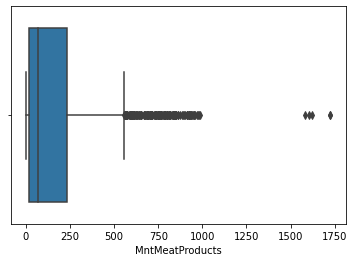

In [ ]:
sns.boxplot(x = data['MntMeatProducts'])
print('Количество выбросов:', emissions_сount(data['MntMeatProducts']))

In [ ]:
# Выбросов в переменной MntMeatProducts - 175, следовательно, их можно удалить
## Для удаления воспользуюсь функцией удаления и сохраню изменения в новый датасет,
## старый датасет трогать не буду
data_new = emissions_delete(data['MntMeatProducts'])

Количество выбросов: 223


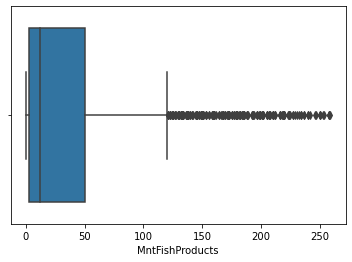

In [ ]:
sns.boxplot(x = data['MntFishProducts'])
print('Количество выбросов:', emissions_сount(data['MntFishProducts']))

In [ ]:
# Выбросов в переменной MntFishProducts - 223, следовательно, их можно удалить
## Для удаления воспользуюсь функцией удаления и сохраню изменения в новый датасет,
## старый датасет трогать не буду
data_new = emissions_delete(data['MntFishProducts'])

Количество выбросов: 250


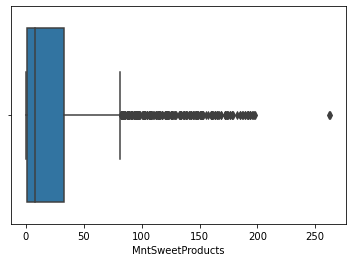

In [ ]:
sns.boxplot(x = data['MntSweetProducts'])
print('Количество выбросов:', emissions_сount(data['MntSweetProducts']))

In [ ]:
# Выбросов в переменной MntSweetProducts - 250, следовательно, их можно удалить
## Для удаления воспользуюсь функцией удаления и сохраню изменения в новый датасет,
## старый датасет трогать не буду
data_new = emissions_delete(data['MntSweetProducts'])

Количество выбросов: 207


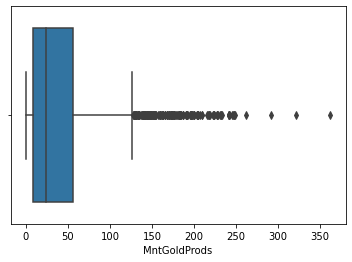

In [ ]:
sns.boxplot(x = data['MntGoldProds'])
print('Количество выбросов:', emissions_сount(data['MntGoldProds']))

In [ ]:
# Выбросов в переменной MntGoldProds - 207, следовательно, их можно удалить
## Для удаления воспользуюсь функцией удаления и сохраню изменения в новый датасет,
## старый датасет трогать не буду
data_new = emissions_delete(data['MntGoldProds'])

Количество выбросов: 147


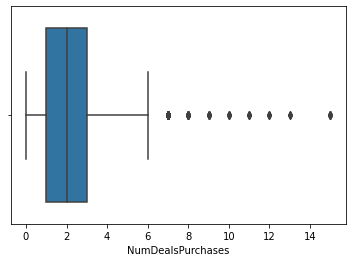

In [ ]:
sns.boxplot(x = data['NumDealsPurchases'])
print('Количество выбросов:', emissions_сount(data['NumDealsPurchases']))

In [ ]:
# Выбросов в переменной NumDealsPurchases - 147, следовательно, их можно удалить
## Для удаления воспользуюсь функцией удаления и сохраню изменения в новый датасет,
## старый датасет трогать не буду
data_new = emissions_delete(data['NumDealsPurchases'])

Количество выбросов: 4


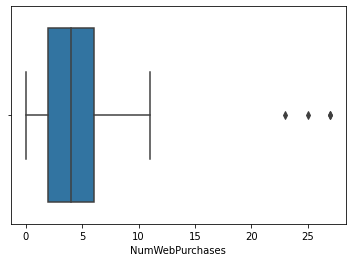

In [ ]:
sns.boxplot(x = data['NumWebPurchases'])
print('Количество выбросов:', emissions_сount(data['NumWebPurchases']))

In [ ]:
# Выбросов в переменной NumWebPurchases - 4, следовательно, их можно удалить(удалены от центра)
## Для удаления воспользуюсь функцией удаления и сохраню изменения в новый датасет,
## старый датасет трогать не буду
data_new = emissions_delete(data['NumWebPurchases'])

Количество выбросов: 71


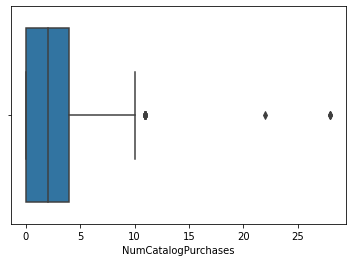

In [ ]:
sns.boxplot(x = data['NumCatalogPurchases'])
print('Количество выбросов:', emissions_сount(data['NumCatalogPurchases']))

In [ ]:
# Выбросов в переменной NumCatalogPurchases - 71, следовательно, их можно удалить
## Для удаления воспользуюсь функцией удаления и сохраню изменения в новый датасет,
## старый датасет трогать не буду
data_new = emissions_delete(data['NumCatalogPurchases'])

Количество выбросов: 9


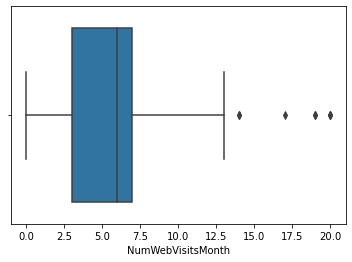

In [ ]:
sns.boxplot(x = data['NumWebVisitsMonth'])
print('Количество выбросов:', emissions_сount(data['NumWebVisitsMonth']))

In [ ]:
# Выбросов в переменной NumWebVisitsMonth - 9, следовательно, их можно удалить (удалены от центра)
## Для удаления воспользуюсь функцией удаления и сохраню изменения в новый датасет,
## старый датасет трогать не буду
data_new = emissions_delete(data['NumWebVisitsMonth'])

Количество выбросов: 0


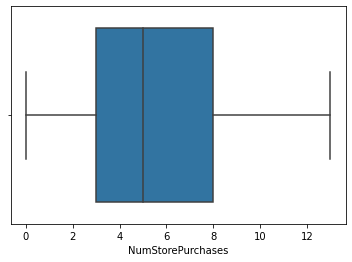

In [ ]:
sns.boxplot(x = data['NumStorePurchases'])
print('Количество выбросов:', emissions_сount(data['NumStorePurchases']))
# Выбросов нет

## Задание 3 (1 балл): новые признаки

Подумайте, какие осмысленные признаки можно создать из имеющихся? Придумайте как минимум 2 и добавьте их, содержательно описав, почему вы их добавляете и по какому принципу.

In [ ]:
# Создадим признак, который проиллюстрирует,
# какой процент от дохода тратится на покупку продуктов. Таким образом, можно увидеть,
# каким клиентам действительно будет важен удобный сервис интернет-магазина.
## Считаем в переменную total_amount сумму расходов на продукты.
total_amount = data['MntFishProducts'] + data['MntMeatProducts'] + data['MntFruits'] + data['MntSweetProducts'] + data['MntWines']
# Чтобы рассчитать новый признак, находим процентную долю расходов на продукты
## от ежегодного дохода (так как расходы в таблице посчитаны за 2 года, доход умножаем на 2)
data['food_percent'] = round(total_amount * 100/(data['Income']*2)*100, 2)

In [ ]:
# Создадим признак, который определит, какие покупки чаще совершает клиент:
# непосредственно в магазине (оффлайн) или через веб-приложения (онлайн)
## Для создания признака воспользуемся методом np.where
## и сравним значения переменных количества оффлан-покупок и онлайн-покупок
data['purchases_type'] = np.where(data['NumStorePurchases'] > data['NumWebPurchases'], 'offline', 'online')

In [ ]:
# Посмотрим, как распределяются клиенты по предпочитаемому виду покупок
data['purchases_type'].value_counts()
# 1563 клиента предпочитают оффлайн покупки:
# можно дальше анализировать, в чем причина этого выбора,
# и улучшить качество веб-приложений для таких покупателей.
## 677 клиента предпочитают онлайн-покупки.

offline    1563
online      677
Name: purchases_type, dtype: int64

## Задание 4 (2.5 балла): время статистики!

Рассчитайте все описательные статистики для категориальных переменных (есть специальный метод, который выводит все доступные статистики разом - это то, что нужно!). Опишите, какие выводы вы можете сделать из полученных данных.

In [ ]:
data[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain']].describe()

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**По получившейся таблице можно посмотреть распределение клиентов, которые согласились/отказались участвовать в опросе в разные кампании. Видно, что с 3 по 5 кампании только чуть больше 7% клиентов согласилось участвовать в опросе. В первую кампанию - чуть больше 2%, во вторую - чуть больше 1%. Ситуация улучшается к последней компании - более 35% клиентов согласилось участвовать в опросе. Делать четкие выводы по этим данным сложно, так как если человек согласился участвовать в одной кампании, в другой кампании он участвовать не мог и в таблице будет стоять 0. По переменной жалоб - жалобы за последние 2 года оставляли только 9% клиентов.  Эти переменные бинарные - можно посмотреть только среднее и моду. Моду посмотрим дальше.**

Рассчитайте все описательные статистики для количественных переменных.  (есть специальный метод, который выводит все доступные статистики разом - это то, что нужно!) Опишите, какие выводы вы можете сделать из полученных данных (хотя бы про какие-то 3 признака).

In [ ]:
# количественных данных очень много, поэтому разделим их на две таблицы со стат. данными
data[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52100.795089,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875
std,11.984069,25077.333783,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000
50%,1970.000000,51075.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000
75%,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


**Рассмотрим статистические данные у переменных Year_Birth и Income.**

**Средний год рождения клиентов - 1969 год с округлением. При этом 25% респондентов рождены раньше 1959 года, 50% - раньше 1970 года, а 75% - раньше 1970. Делаем вывод, что остальная часть респондентов рождены позже 1970 и их 25%. Удивителен самый ранний год рождения опрашиваемых - 1893 год, а поздний - 1996 год. Не очень в таком случае ясна выборка респондентов. Среднеквадратичное отклонение года рождения равно примерно 12 лет с округлением.**

**Ежегодный доход респондентов в среднем составляет примерно 52100 долларов, при этом среднеквадратичное отклонение дохода равно примерно 25077.33 долларов с округлением. Делаем вывод, что выбраны респонденты с разнообразным доходом, минимальный доход, например, составляет 1730 долларов, а максимальный - 666666. 25% респондентов имеют доход меньше 35538.75 долларов, 50% - меньше 51075, а 75% - меньше 68289 долларов. Судя по значениям максимального и минимального видим, что есть ярко выраженные экстремально высокие и экстремально низкие значения дохода. (их примерно 50%, если смотреть с двух сторон распределения).**

In [ ]:
data[['NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'NumWebPurchases']].describe()

,NumDealsPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,NumWebPurchases
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,2.325000,2.662054,5.790179,5.316518,4.084821
std,1.932238,2.923101,3.250958,2.426645,2.778714
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,3.000000,3.000000,2.000000
50%,2.000000,2.000000,5.000000,6.000000,4.000000
75%,3.000000,4.000000,8.000000,7.000000,6.000000
max,15.000000,28.000000,13.000000,20.000000,27.000000


**Рассмотрим статистические данные у переменной NumWebPurchases - покупок через веб-приложение компании**

**В среднем каждый респондент совершил 4 покупки через веб-приложение, среднеквадратичное количество онлайн-покупок равно примерно 3 с округлением. При этом есть клиенты, совершившие ноль покупок (минимальное значение равно нулю), а также те, которые совершили 27 покупки через приложение. 25% респондентов совершили менее 2 онлайн-покупок, 50% - менее 4, 75% - менее 6. Делаем вывод, что веб приложение не является какой-то ежедневной необходимостью, так как только 25% респондентов совершили более 6 покупок**

In [ ]:
# Для быстроты и удобства считаем моду для каждой переменной,
## используя метод mode сразу для всей таблицы и индексирую первую строку,
### в которую добавляются моды всех переменных
data.mode().iloc[0]

ID                                       0
Year_Birth                          1976.0
Education                       Graduation
Marital_Status                     Married
Income                             38578.0
Kidhome                                0.0
Teenhome                               0.0
Dt_Customer            2012-08-31 00:00:00
Recency                               56.0
MntWines                               2.0
MntFruits                              0.0
MntMeatProducts                        7.0
MntFishProducts                        0.0
MntSweetProducts                       0.0
MntGoldProds                           1.0
NumDealsPurchases                      1.0
NumWebPurchases                        2.0
NumCatalogPurchases                    0.0
NumStorePurchases                      3.0
NumWebVisitsMonth                      7.0
AcceptedCmp3                           0.0
AcceptedCmp4                           0.0
AcceptedCmp5                           0.0
AcceptedCmp

**Чаще всего встречаются респонденты с годом рождения 1976 год, при этом интересно, что респонденты в большинстве случаев получили высшее образование (graduated), они женаты/замужем и не имеют детей (ни маленьких, ни подросткового возраста), их ежегодный доход равен 38578 долларов. Учитывая, что часто встречающийся год рождения это 1976 и на момент часто встречающейся даты опроса (2012 год) респондентам было примерно 36 лет, данные про образование и семейный статус звучат корректно. Наиболее часто в опросе участвовали жители Испании (SP в столбце Country).**

Выберите 3 интересующих вас количественных признака и рассчитайте релевантные с вашей точки зрения описательные статистики для этих признаков, сгруппировав данные по семейному положению, образованию, стране. Какие закономерности вы можете отметить? Как их можно проинтерпретировать?

In [ ]:
# Сгруппируем количество онлайн-покупок через приложение и страну проживания респондента
## С помощью метода agg добавляем описательные статистики,
### а также создаем отдельные столбцы с квартилями.
x = data.groupby('Country')['NumWebPurchases'].agg(['mean', 'median', 'std', 'max', 'min'])
x['25%'] = data.groupby('Country')['NumWebPurchases'].quantile(.25)
x['75%'] = data.groupby('Country')['NumWebPurchases'].quantile(.75)
x

,mean,median,std,max,min,25%,75%
Country,,,,,,,
AUS,4.087500,4.0,3.127053,27,0,2.0,6.0
CA,4.305970,4.0,2.782308,11,0,2.0,6.0
GER,3.975000,3.0,2.717706,11,0,2.0,6.0
IND,3.945946,3.0,2.651617,11,0,2.0,6.0
ME,6.000000,6.0,4.000000,10,2,4.0,8.0
SA,4.145401,3.0,2.641178,11,0,2.0,6.0
SP,4.001826,4.0,2.793306,27,0,2.0,6.0
US,4.440367,4.0,2.706067,11,0,2.0,6.0


**По количеству покупок для каждой страны выявлены следующие закономерности:**

**1. В целом во всех странах респонденты в среднем делают +- 4 онлайн-покупки. Лидером является Монтенегро (абрревиатура ME по интернет ресурсам намекает на эту страну), там респонденты совершают по 6 онлайн-покупок.**

**2. 75% респондентов во всех странах совершают 6-8 онлайн-покупок.**

**3. Минимальным количеством онлайн-покупок для большинства стран является 0, и только в Монтенегро - 2 (то есть нет респондентов из этой страны, не совершающих покупки через веб-приложение). При этом интересно, что по максимально совершенному количеству покупок Монтенегро не лидер, в этой стране, как и в целом в других странах, это значение варьируется от 10 до 11 покупок. Лидерами здесь являются Австралия и Испания (27 покупок)**

In [ ]:
# Сгруппируем уровень дохода и уровень образования респондента
## С помощью метода agg добавляем описательные статистики,
### а также создаем отдельные столбцы с квартилями.
x = data.groupby('Education')['Income'].agg(['mean', 'median', 'std', 'max', 'min']).round()
x['25%'] = data.groupby('Education')['Income'].quantile(.25)
x['75%'] = data.groupby('Education')['Income'].quantile(.75)
x

,mean,median,std,max,min,25%,75%
Education,,,,,,,
2n Cycle,47499.0,46772.0,21982.0,96547.0,7500.0,28095.00,65100.5
Basic,20306.0,20744.0,6235.0,34445.0,7500.0,15405.25,24882.0
Graduation,52582.0,51651.0,28074.0,666666.0,1730.0,34925.50,69737.0
Master,52724.0,50184.0,20089.0,157733.0,6560.0,37853.75,66596.0
PhD,55965.0,55005.0,20583.0,162397.0,4023.0,39821.25,69084.0


**По уровню дохода для каждой категории образования выявлены следующие закономерности:**

**1. Средний уровень дохода зависит в большинстве случаев от уровня образования. Например, кандидаты наук в среднем получают 55965.0 долларов в год, это самый высокий уровень дохода среди остальных категорий образования. Следом идут респонденты, окончившие магистратуру, их доход составляет 52582.0 долларов в год. Самый малый доход имеют респонденты, получившие среднее образование, видимо только школьное, -  20306.0 в год.**

**2. В целом 75% респондентов из каждой категории образования получают зарплату менее 70000 долларов в год с округлением. Только 75% респонденты, получивших среднее образование, получают мене 25 тысяч долларов в год с округлением**

**3. В целом по всем метрикам заметна связь между образованием и уровнем дохода. Интересно здесь то, что респонденты, получившие второе образование, имеют доход меньше, чем магистраты, кандидаты наук и бакалавры.**

**4. Максимальный и минимальный доход получают респонденты-бакалавры.**

In [ ]:
# Сгруппируем год рождения и семейный статус респондента
## С помощью метода agg добавляем описательные статистики,
### а также создаем отдельные столбцы с квартилями.
x = data.groupby('Marital_Status')['Year_Birth'].agg(['mean', 'median', 'std', 'max', 'min']).round()
x['25%'] = data.groupby('Marital_Status')['Year_Birth'].quantile(.25)
x['75%'] = data.groupby('Marital_Status')['Year_Birth'].quantile(.75)
x

,mean,median,std,max,min,25%,75%
Marital_Status,,,,,,,
Absurd,1975.0,1975.0,25.0,1993,1957,1966.0,1984.0
Alone,1973.0,1973.0,15.0,1988,1958,1965.5,1980.5
Divorced,1966.0,1968.0,11.0,1989,1900,1959.0,1974.0
Married,1970.0,1971.0,11.0,1996,1941,1961.0,1978.0
Single,1971.0,1972.0,13.0,1995,1893,1962.0,1982.0
Together,1968.0,1969.0,12.0,1994,1899,1958.0,1977.0
Widow,1959.0,1958.0,9.0,1978,1943,1950.0,1966.0
YOLO,1973.0,1973.0,0.0,1973,1973,1973.0,1973.0


**По году рождения для каждой категории семейного статуса выявлены следующие закономерности:**

**1. Самые взрослые респонденты в среднем овдовели - 1959 год рождения. При этом в 1941 году рожден самый взрослый замужний/женатый респондент, а в 1900 - самый взрослый разведенный респондент. Респонденты, которые женаты/замужем или имеют сожителей, рождены в среднем в 1970 год и 1968 год.**

**2. Более молодые респонденты имеют разный семейный статус - люди, рожденные в среднем в 1971-1975 году имеют или "неясный" (absurd) семейный статус, они либо одиноки или же ведут образ жизни YOLO (от англ. you only live once — «ты живешь только один раз») — понятие, которое описывает стремление исполнять желания и получать удовольствие прямо сейчас, поэтому они не стремятся к браку(источник https://secretmag.ru/enciklopediya/chto-takoe-yolo-obyasnyaem-prostymi-slovami.htm). Это подтверждается результатами, полученными по квартилям, только 25% таких респондентов родились раньше 1965-1996 годов, а 25% приверженцы YOLO и вовсе младше 1973 года, то есть чаще встречаются более молодые респонденты). При этом приверженцев YOLO судя по всему не так много (посмотрим), так как описательные статистики одинаковы.**

In [ ]:
# проведем фильтрацию только по приверженцам YOLO
data[data['Marital_Status'] == 'YOLO']
# только 2 респондента являются приверженцами YOLO, предположение оправдалось.
## Интересно, что респонденты участвовали в опросе в 2012 (колонка Dt_Customer),
## в это время YOLO было наиболее популярно. https://secretmag.ru/enciklopediya/chto-takoe-yolo-obyasnyaem-prostymi-slovami.htm

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,purchases_type
103,492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,8,0,0,0,0,0,0,0,CA,online
104,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,8,0,0,0,0,0,1,0,IND,online


## Задание 5 (1 балл): корреляции

Найдите три самых сильных линейных взаимосвязи.Опишите, между какими признаками вы их нашли и содержательно проинтерпретируйте, почему (с вашей точки зрения) эти показатели связаны.


In [ ]:
# Создаем корреляционную матрицу между только НЕПРЕРЫВНЫМИ переменными:
## суммы денег, потраченных на разные продукты, а также доход респондентов
data[[ 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Income']].corr()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Income
MntWines,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.577732
MntFruits,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,0.428801
MntMeatProducts,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,0.577001
MntFishProducts,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,0.437915
MntSweetProducts,0.386581,0.567164,0.523846,0.579870,1.000000,0.369724,0.435029
MntGoldProds,0.387516,0.392995,0.350609,0.422875,0.369724,1.000000,0.320884
Income,0.577732,0.428801,0.577001,0.437915,0.435029,0.320884,1.000000


**Cамые сильные три связи наблюдаются между следующими переменными:**

**MntFishProducts и MntFruits. Корреляционный коэффициент между этими переменными равен 0.59 с округлением. Связь здесь заметная, скорее всего, переменные так коррелируют за счет того, что вместе с рыбой часто покупают фрукты - лимон, чтобы запечь их вместе с рыбой. Здесь заметен кулинарный подтекст**

**Income и MntWines. Корреляционный коэффициент между этими переменными равен 0.58 с округлением. Связь здесь также заметная, скорее всего такая корреляция связана с тем, что с возрастанием дохода люди могут покупать хорошую винную продукцию к ужину (коэффициент положительный, так что можно говорить о том, что с возрастанием одной переменной возрастает и другая)**

**MntFishProducts и MntSweetProducts. Корреляционный коэффициент между этими переменными так же равен 0.58 с округлением. Связь здесь всё так же заметная, но интересно, как же могут быть связаны рыба и сладости. Можно предположить, что многие покупают рыбу чаще всего на какие-то праздники, а вместе с тем покупают что-то и на десерт в виде сладостей.**

## Задание 6 (2 балла) : визуализации

Придумайте и постройте как минимум 6 содержательных визуализаций, которые будут иллюстрировать те или иные выводы, которые вы сделали на основе данных. К каждой визуализации должна прилагаться содержательная текстовая интерпретация. Каждая визуализация должна быть грамотно оформлена, с соблюдением всем правил. Необходимо задействовать не менее 4 типов диаграмм.

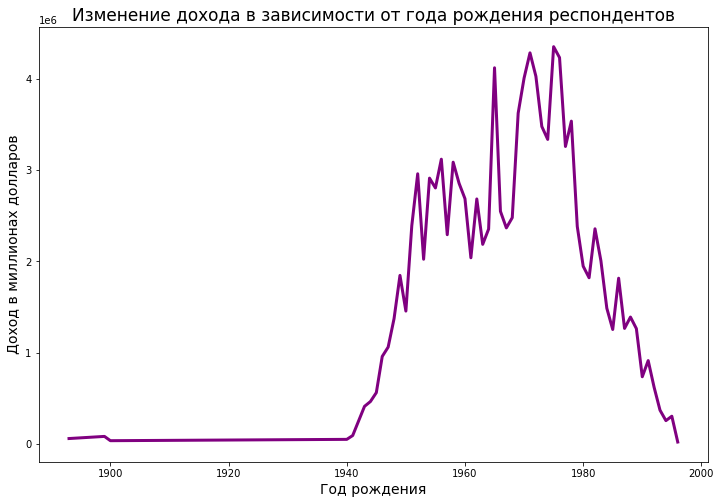

In [ ]:
# Мы посмотрели,сгруппированные данные по году рождения и семейному статусу,
## теперь посмотрим, как меняется доход в зависимости от года рождения через линейный график

# создаем канву для графика
fig, ax = plt.subplots(figsize=[12,8])
# рисуем линейный график по сгрупированным данными года рождения и суммированного дохода
ax.plot(data.groupby('Year_Birth')['Income'].sum(), 'purple', linewidth = 3)
# настраиваем подписи и заголовок
ax.set_title('Изменение дохода в зависимости от года рождения респондентов', fontsize = 17)
ax.set_ylabel('Доход в миллионах долларов', fontsize=14)
ax.set_xlabel('Год рождения', fontsize=14)
# выводим график
plt.show()

In [ ]:
# находим самую раннюю дату опроса
data['Dt_Customer'].min()

Timestamp('2012-07-30 00:00:00')

**На графике нет четкого тренда, но видна закономерность: самые взрослые и молодые респонденты получают меньший доход (с 1950 идет сильное возрастание, с 1980 года рождения начинается спад). Наибольший доход получают респонденты, которым в 2012 (год самого раннего опроса) было 32-55 лет (средний возраст) - рожденные с 1960 по 1980 годы. Причем самый пик дохода приходится на годы с 1970 по 1980 примерно (суммарно больше 4 миллионов долларов).**

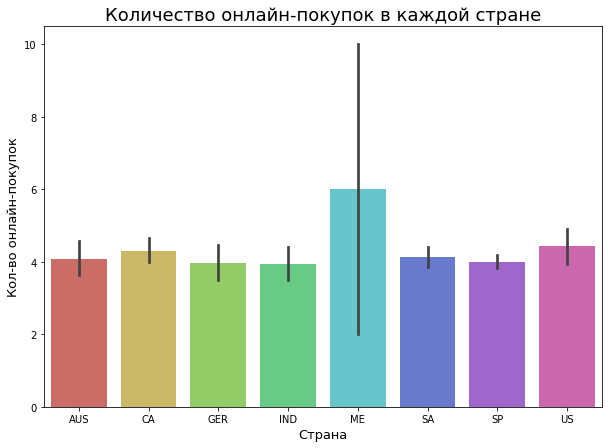

In [ ]:
# Раннее мы смотрели количество онлайн-покупок в зависимости от страны,
## сделаем визуализацию этой группировки с помощью столбчатой диаграммы

# создаем канву для графика
fig, ax = plt.subplots(figsize=[10,7])
# создаем столбчатую диаграмму, палетка цветов взята из документации: https://seaborn.pydata.org/tutorial/color_palettes.html
## также отсортируем страны по алфавиту с помощью метода sort_values()
sns.barplot(x=data['Country'].sort_values(), y=data['NumWebPurchases'], palette='hls')
# настраиваем подпись и заголовок
ax.set_title('Количество онлайн-покупок в каждой стране', fontsize = 18)
ax.set_ylabel('Кол-во онлайн-покупок', fontsize=13)
ax.set_xlabel('Cтрана', fontsize=13)
# выводим график
plt.show()

**Столбчатая диаграмма подтвердила данные, полученные по группировке. Почти во всех странах респонденты совершали примерно 4 покупки(и чуть больше, например, в Канаде -  СА, CША - US) через веб-приложение, и лишь в Монтенегро количество покупок равно 6. При этом в каждой стране есть "выброс" - респондент, который совершал больше покупок, лидером здесь так же является Монтенегро**

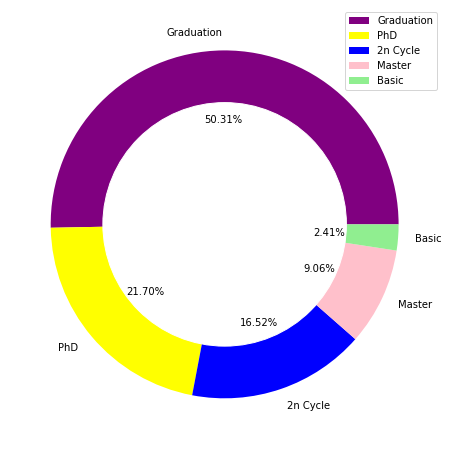

In [ ]:
# Круговая (пончиковая) диаграмма для распределения значений категории образования
## Как ее рисовать, источник: https://python-graph-gallery.com/161-custom-matplotlib-donut-plot/

# Cоздаем легенду для графика из уникальных значений столбца
names = data['Education'].unique()
# создаем канфу для графика
fig, ax = plt.subplots(figsize=[12,8])
# рисуем круговую диаграмму
ax.pie(data['Education'].value_counts(), autopct='%.2f%%', labels = names, colors=['purple','yellow','blue', 'pink', 'lightgreen'])
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
# Добавляем легенду
ax.legend()
# Выводим график
plt.show()

**По диаграмме видно, что половина респондентов получили высшее образование (Graduation), около 22% респондентов - кандидаты наук, 16.5% - получают второе высшее, а оставшиеся 11% приходится на магистров и респондентов, получивших только школьное образование**

/Users/mcndrw/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


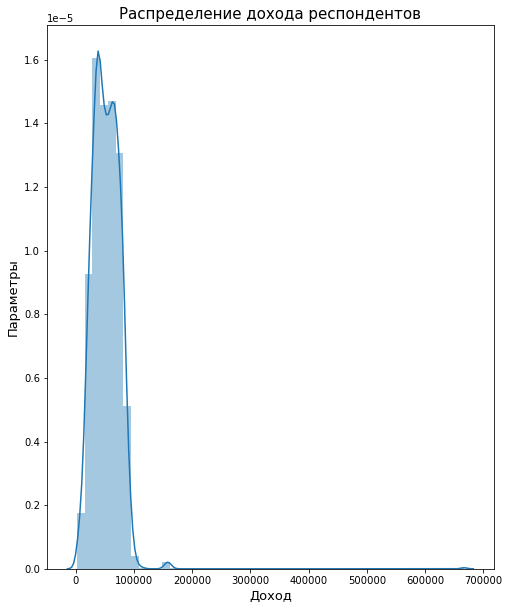

In [ ]:
# Рисуем distplot для переменной дохода
# cоздаем канву для графика
fig, ax = plt.subplots(figsize=[8,10])
# рисуем график, настраиваем все подписи и название
sns.distplot(data['Income'])
ax.set_title('Распределение дохода респондентов', fontsize = 15)
ax.set_ylabel('Параметры', fontsize=13)
ax.set_xlabel('Доход', fontsize=13)
# выводим график
plt.show()

**График distplot объединяет в себе гистограмму и график плотности. Видно, что в целом распределение переменной дохода было бы приближено к симметричному распределению, если бы не выбросы - экстремально высокие значение дохода, которых очень мало, их почти не видно на графике, и которые превышают 100000 долларов в год. Большинство значений "уплотнены" - находятся - в промежутке от 0 до 100000 долларов в год. Особенно часто встречаются значения приблизительно от 300000 до 50000 долларов.**

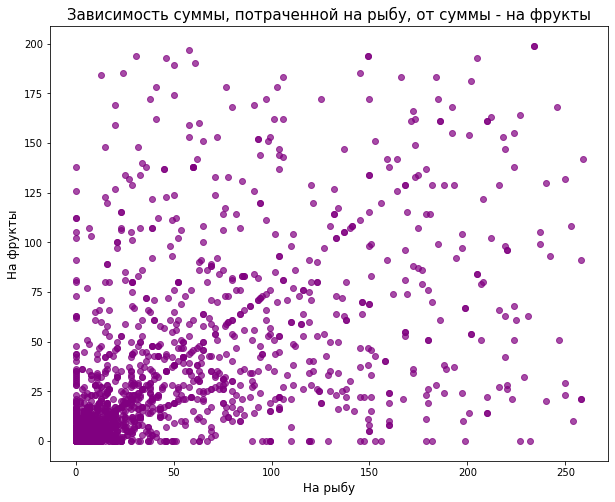

In [ ]:
# Нарисуем график рассеяния между переменными сумм, потраченных на рыбу и на фрукты

# создаем канву для графика
fig, ax = plt.subplots(figsize=[10,8])
# рисуем график, используя параметр alpha для прозрачности, чтобы видеть все точки
graph = ax.scatter(x = data['MntFishProducts'], y = data['MntFruits'], alpha=0.7, c = 'purple')
# настраиваем подписи и название
ax.set_title('Зависимость суммы, потраченной на рыбу, от суммы - на фрукты', fontsize=15)
ax.set_xlabel('На рыбу', fontsize=12)
ax.set_ylabel('На фрукты', fontsize=12)
# выводим график
plt.show()

**График рассеяния показывает довольно хаотичное распределение точек. Четкую зависимость сложно уловить, хотя коэффициент корреляции равен 0.59 и связь должна была быть более заметной. Видно, что есть большое количество выбросов в обеих переменных. Точка сосредоточены в интервале от 0 до 50 ед. для обеих переменных.**

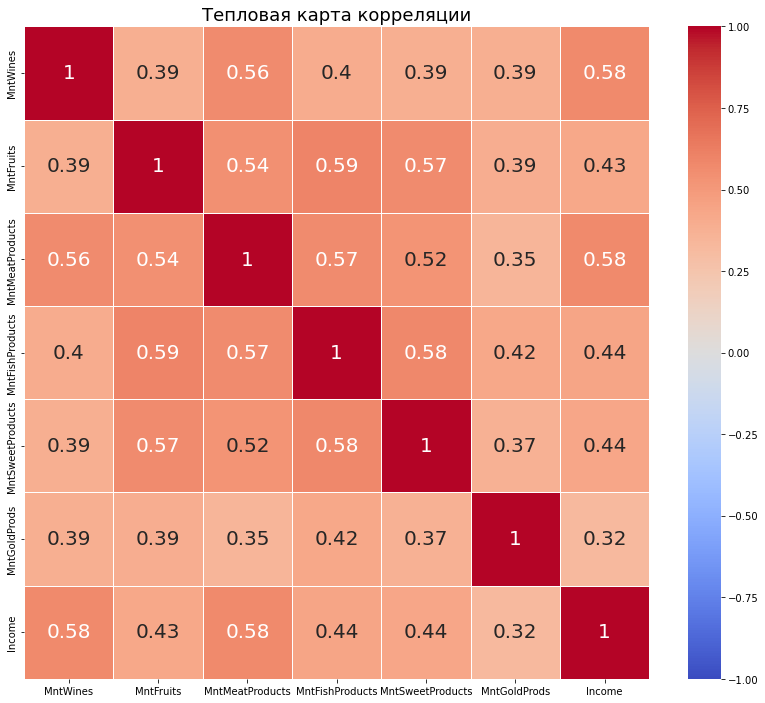

In [ ]:
# Нарисуем тепловую карту корреляции для наших переменных.

# создаем корреляционную матрицу
correlation = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Income']].corr()
# создаем канву для графика
fig, ax = plt.subplots(figsize=[14,12])
# настраиваем заголовок
ax.set_title('Тепловая карта корреляции', fontsize=18)
# рисуем тепловую карту, указывая цветовую гамму и ее распределение для коэффициентов от 1 до -1.
sns.heatmap(correlation, annot = True, linecolor = 'white', linewidth = 0.5, annot_kws = {'size': 20}, cmap= 'coolwarm', vmin=-1, vmax = 1)
# выводим карту
plt.show()

**По тепловой карте заметно, что в наших данных нет сильных или высокий корреляционных связей. Преобладает умеренная связь (от 0.3 до 0.5) и от 0.54 до 0.59 - заметная связь (единицы не учитываем, это корреляции переменных с самими собой). За счет того, что все наши корреляции окрашены в теплые оттенки - можно даже визуально сделать вывод о том, что все связи положительные (по распределению отрицательные коэффициенты имели бы холодные оттенки), следовательно, во всех корреляциях переменные растут друг с другом, а не наоборот.**

## Задание 7 (2 балла): немного исследований

Попробуйте найти в данных какую-то классную интересную особенность. Может быть, рыбу едят только неженатые? Или самый большой заработок и потребление фруктов у людей без образования? Приведите все расчеты, и визуализации для обнаруженного факта. Он должен быть правда интересным и удивлять! Попробуйте описать, почему (как вам кажется) так получилось.

In [ ]:
# Посмотрим, люди в какой категории образования чаще всего покупают продукты со скидками
data.groupby('Education')['NumDealsPurchases'].sum()

Education
2n Cycle       456
Basic           97
Graduation    2603
Master         898
PhD           1154
Name: NumDealsPurchases, dtype: int64

Text(0.5, 0, 'Категория образования')

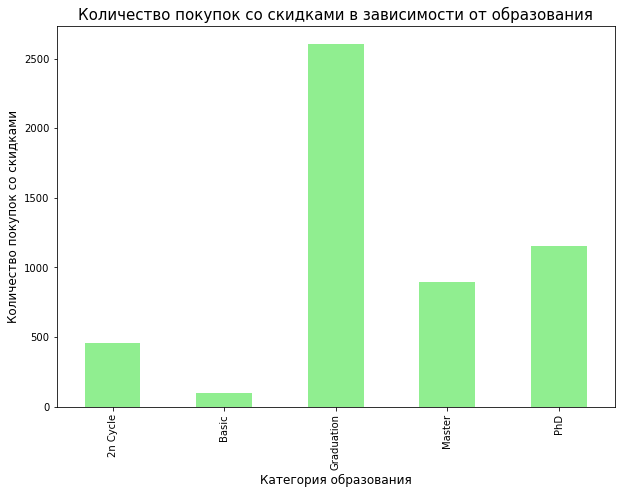

In [ ]:
fig, ax = plt.subplots(figsize=[10,7])
ax = data.groupby('Education')['NumDealsPurchases'].sum().plot(kind='bar', color = 'lightgreen')
ax.set_title('Количество покупок со скидками в зависимости от образования', fontsize = 15)
ax.set_ylabel('Количество покупок со скидками', fontsize = 12)
ax.set_xlabel('Категория образования', fontsize = 12)

**Расчеты и график показали, что на удивление чаще всего покупки со скидками совершают люди, окончившие высшее учебное заведение (более 2500 покупок), а также кандидаты наук (больше 1000). При этом интересно, что они получают доход больше остальных респондентов из других категорий образования (смотрела это выше). Насчет тех респондентов, которые получили высшее образование, все ясно: их просто в нашей таблице больше остальных. Но интересная ситуация с кандидатами наук, возможно дело так же в том, что их побольше.**

In [ ]:
# Посмотрим, люди в какой cемейном статусе покупают в среднем дорогие золотые украшения
data.groupby('Marital_Status')['MntGoldProds'].mean()

Marital_Status
Absurd      204.000000
Alone        27.000000
Divorced     46.288793
Married      42.822917
Single       43.729167
Together     42.994828
Widow        56.766234
YOLO         42.000000
Name: MntGoldProds, dtype: float64

Text(0.5, 0, 'Семейный статус')

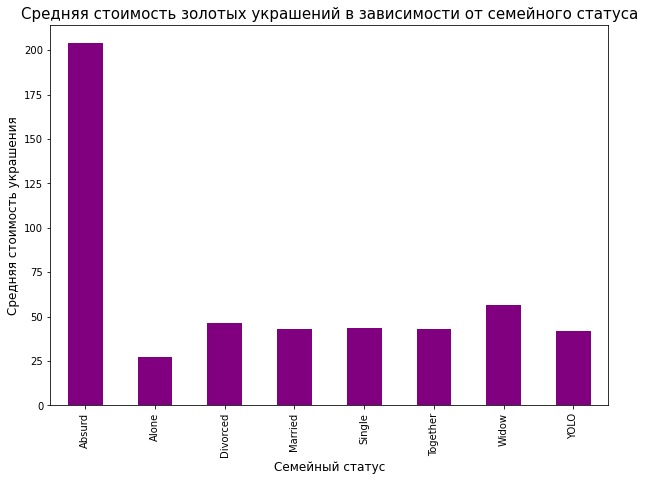

In [ ]:
fig, ax = plt.subplots(figsize=[10,7])
ax = data.groupby('Marital_Status')['MntGoldProds'].mean().plot(kind='bar', color = 'purple')
ax.set_title('Средняя стоимость золотых украшений в зависимости от семейного статуса', fontsize = 15)
ax.set_ylabel('Средняя стоимость украшения', fontsize = 12)
ax.set_xlabel('Семейный статус', fontsize = 12)

**Интересно, что больше денег на золотые украшения в среднем тратят люди со смешанным, непонятным статусом - absurd. В среднем они тратят на золото более 200 ед. Респонденты из остальных семейных статусов тратят примерно в 10 раз меньше. Возможно респондентам с absurd cемейным статусом нравится привлекать к себе внимание, ухаживать за собой именно таким способом**

## Задание 8(0.5 балла): мем

Придумайте мем про это ДЗ и статистику и прикрепите ниже.

![photo_2023-11-02%2020.31.49.jpeg](attachment:photo_2023-11-02%2020.31.49.jpeg)